In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
mta = pd.read_csv("MTA_Subway_Hourly_Ridership__Beginning_February_2022.csv")

C:\Users\Code\AppData\Local\Temp\ipykernel_4760\303107443.py:1: DtypeWarning: Columns (4,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  mta = pd.read_csv("MTA_Subway_Hourly_Ridership__Beginning_February_2022.csv")


In [3]:
mta.head()

,transit_timestamp,station_complex_id,station_complex,borough,routes,payment_method,ridership,transfers,latitude,longitude,Georeference
0,03/19/2022 03:00:00 AM,H007,1 Av (L),M,L,omny,41,0,40.730953,-73.981628,POINT (-73.98162841796875 40.730953216552734)
1,03/25/2022 04:00:00 AM,H007,1 Av (L),M,L,omny,11,0,40.730953,-73.981628,POINT (-73.98162841796875 40.730953216552734)
2,05/03/2022 12:00:00 AM,H007,1 Av (L),M,L,omny,59,0,40.730953,-73.981628,POINT (-73.98162841796875 40.730953216552734)
3,06/28/2022 01:00:00 AM,H007,1 Av (L),M,L,omny,41,0,40.730953,-73.981628,POINT (-73.98162841796875 40.730953216552734)
4,08/29/2022 04:00:00 AM,H007,1 Av (L),M,L,omny,3,0,40.730953,-73.981628,POINT (-73.98162841796875 40.730953216552734)


In [4]:
mta.dtypes

transit_timestamp      object
station_complex_id     object
station_complex        object
borough                object
routes                 object
payment_method         object
ridership              object
transfers              object
latitude              float64
longitude             float64
Georeference           object
dtype: object

In [5]:
mta.shape

(11566994, 11)

In [6]:
# Koordinat bilgileri içeren değişkenleri şimdilik veri setinden kaldırdım. Büyük veri ile çalışmayı kolaylaştırmak için
mta_2 = mta.drop(["latitude", "longitude","Georeference"], axis=1)
mta_2.head()

,transit_timestamp,station_complex_id,station_complex,borough,routes,payment_method,ridership,transfers
0,03/19/2022 03:00:00 AM,H007,1 Av (L),M,L,omny,41,0
1,03/25/2022 04:00:00 AM,H007,1 Av (L),M,L,omny,11,0
2,05/03/2022 12:00:00 AM,H007,1 Av (L),M,L,omny,59,0
3,06/28/2022 01:00:00 AM,H007,1 Av (L),M,L,omny,41,0
4,08/29/2022 04:00:00 AM,H007,1 Av (L),M,L,omny,3,0


In [7]:
# Tarih değişkenleri düzenlendi
date_time_parts = mta_2['transit_timestamp'].str.split()
mta_2['date'] = date_time_parts.str[0]  
mta_2['time'] = date_time_parts.str[1] 
mta_2['transit_timestamp'] = pd.to_datetime(mta_2['transit_timestamp'], format='%m/%d/%Y %I:%M:%S %p')
mta_2["day_of_week"] = mta_2["transit_timestamp"].dt.day_name()
mta_2.drop(["transit_timestamp"], inplace = True , axis = 1)
mta_2.head()

,station_complex_id,station_complex,borough,routes,payment_method,ridership,transfers,date,time,day_of_week
0,H007,1 Av (L),M,L,omny,41,0,03/19/2022,03:00:00,Saturday
1,H007,1 Av (L),M,L,omny,11,0,03/25/2022,04:00:00,Friday
2,H007,1 Av (L),M,L,omny,59,0,05/03/2022,12:00:00,Tuesday
3,H007,1 Av (L),M,L,omny,41,0,06/28/2022,01:00:00,Tuesday
4,H007,1 Av (L),M,L,omny,3,0,08/29/2022,04:00:00,Monday


In [8]:
# Ridership ve Transfers değişkenlerinin int ya da float veri tipine dönüştürülmesi gerekiyor.
mta_2.dtypes

station_complex_id    object
station_complex       object
borough               object
routes                object
payment_method        object
ridership             object
transfers             object
date                  object
time                  object
day_of_week           object
dtype: object

In [11]:
mta_2["ridership"].value_counts()

1         224668
2         203552
3         182184
4         162946
5         147301
           ...  
10,881         1
10,362         1
8,235          1
8,062          1
899            1
Name: ridership, Length: 8953, dtype: int64

In [10]:
mta_2["transfers"].value_counts()

0        4953521
1        1547120
2         893799
3         610593
4         452059
          ...   
1,317          1
1,301          1
1,399          1
925            1
696            1
Name: transfers, Length: 2178, dtype: int64

In [12]:
# Ridership ve Transfers değişkeninde "," stringi mevcut. Gerekli düzeltilme yapıldı. Veri int32 tipine dönüştürüldü.
mta_2["ridership"] = mta_2["ridership"].str.replace(",","")
mta_2["transfers"] = mta_2["transfers"].str.replace(",","")
mta_2["ridership"].fillna(0, inplace=True)
mta_2["ridership"] = mta_2["ridership"].astype("int32")
mta_2["transfers"].fillna(0, inplace=True)
mta_2["transfers"] = mta_2["transfers"].astype("int32")

<bound method DataFrame.info of          station_complex_id station_complex borough routes payment_method  \
0                      H007        1 Av (L)       M      L           omny   
1                      H007        1 Av (L)       M      L           omny   
2                      H007        1 Av (L)       M      L           omny   
3                      H007        1 Av (L)       M      L           omny   
4                      H007        1 Av (L)       M      L           omny   
...                     ...             ...     ...    ...            ...   
11566989               R419   Zerega Av (6)      BX      6           omny   
11566990               R419   Zerega Av (6)      BX      6      metrocard   
11566991               R419   Zerega Av (6)      BX      6      metrocard   
11566992               R419   Zerega Av (6)      BX      6      metrocard   
11566993               R419   Zerega Av (6)      BX      6      metrocard   

          ridership  transfers        date 

In [13]:
mta_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11566994 entries, 0 to 11566993
Data columns (total 10 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   station_complex_id  object
 1   station_complex     object
 2   borough             object
 3   routes              object
 4   payment_method      object
 5   ridership           int32 
 6   transfers           int32 
 7   date                object
 8   time                object
 9   day_of_week         object
dtypes: int32(2), object(8)
memory usage: 794.2+ MB


In [14]:
mta_2.head()

,station_complex_id,station_complex,borough,routes,payment_method,ridership,transfers,date,time,day_of_week
0,H007,1 Av (L),M,L,omny,41,0,03/19/2022,03:00:00,Saturday
1,H007,1 Av (L),M,L,omny,11,0,03/25/2022,04:00:00,Friday
2,H007,1 Av (L),M,L,omny,59,0,05/03/2022,12:00:00,Tuesday
3,H007,1 Av (L),M,L,omny,41,0,06/28/2022,01:00:00,Tuesday
4,H007,1 Av (L),M,L,omny,3,0,08/29/2022,04:00:00,Monday


In [16]:
# time (saat) değişkeni 00.00- 06.00 , 06.00 - 12.00 , 12.00 - 18.00  ve 18.00 - 24.00 şeklinde aralık verilerek kategorize edildi.
mta_2['time'] = pd.to_datetime(mta_2['time'], format='%H:%M:%S')


def saat_araligi(time):
    if 0 <= time.hour < 6:
        return '00.00 - 06.00'
    elif 6 <= time.hour < 12:
        return '06.00 - 12.00'
    elif 12 <= time.hour < 18:
        return '12.00 - 18.00'
    else:
        return '18.00 - 24.00'


mta_2['saat_araligi'] = mta_2['time'].apply(saat_araligi)
mta_2.head(10)

,station_complex_id,station_complex,borough,routes,payment_method,ridership,transfers,date,time,day_of_week,saat_araligi
0,H007,1 Av (L),M,L,omny,41,0,03/19/2022,1900-01-01 03:00:00,Saturday,00.00 - 06.00
1,H007,1 Av (L),M,L,omny,11,0,03/25/2022,1900-01-01 04:00:00,Friday,00.00 - 06.00
2,H007,1 Av (L),M,L,omny,59,0,05/03/2022,1900-01-01 12:00:00,Tuesday,12.00 - 18.00
3,H007,1 Av (L),M,L,omny,41,0,06/28/2022,1900-01-01 01:00:00,Tuesday,00.00 - 06.00
4,H007,1 Av (L),M,L,omny,3,0,08/29/2022,1900-01-01 04:00:00,Monday,00.00 - 06.00
5,H007,1 Av (L),M,L,omny,32,0,09/19/2022,1900-01-01 01:00:00,Monday,00.00 - 06.00
6,H007,1 Av (L),M,L,omny,32,0,11/14/2022,1900-01-01 01:00:00,Monday,00.00 - 06.00
7,H007,1 Av (L),M,L,omny,141,0,02/12/2023,1900-01-01 08:00:00,Sunday,06.00 - 12.00
8,H007,1 Av (L),M,L,omny,97,0,08/13/2023,1900-01-01 02:00:00,Sunday,00.00 - 06.00
9,H007,1 Av (L),M,L,omny,18,0,09/10/2023,1900-01-01 05:00:00,Sunday,00.00 - 06.00


In [17]:
mta_2.drop(["time"], axis = 1 , inplace = True)

In [19]:
mta_2.rename(columns={'saat_araligi': 'time'}, inplace=True)

In [20]:
mta_2.head()

,station_complex_id,station_complex,borough,routes,payment_method,ridership,transfers,date,day_of_week,time
0,H007,1 Av (L),M,L,omny,41,0,03/19/2022,Saturday,00.00 - 06.00
1,H007,1 Av (L),M,L,omny,11,0,03/25/2022,Friday,00.00 - 06.00
2,H007,1 Av (L),M,L,omny,59,0,05/03/2022,Tuesday,12.00 - 18.00
3,H007,1 Av (L),M,L,omny,41,0,06/28/2022,Tuesday,00.00 - 06.00
4,H007,1 Av (L),M,L,omny,3,0,08/29/2022,Monday,00.00 - 06.00


In [21]:
#####################################

In [22]:
# Kayıp gözlem var mı ? 
mta_2.isnull().sum()

station_complex_id    0
station_complex       0
borough               0
routes                0
payment_method        0
ridership             0
transfers             0
date                  0
day_of_week           0
time                  0
dtype: int64

In [23]:
# Tekrar eden gözlem var mı ?
mta_2.duplicated().sum()

2807511

In [24]:
mta_3 = mta_2.drop_duplicates()

In [27]:
mta_3.head()

,station_complex_id,station_complex,borough,routes,payment_method,ridership,transfers,date,day_of_week,time
0,H007,1 Av (L),M,L,omny,41,0,03/19/2022,Saturday,00.00 - 06.00
1,H007,1 Av (L),M,L,omny,11,0,03/25/2022,Friday,00.00 - 06.00
2,H007,1 Av (L),M,L,omny,59,0,05/03/2022,Tuesday,12.00 - 18.00
3,H007,1 Av (L),M,L,omny,41,0,06/28/2022,Tuesday,00.00 - 06.00
4,H007,1 Av (L),M,L,omny,3,0,08/29/2022,Monday,00.00 - 06.00


In [38]:
# "date" sütununu datetime nesnelerine dönüştürme
mta_3['date'] = pd.to_datetime(mta_3['date'], format='%m/%d/%Y')

# Sadece bahar (Mart, Nisan, Mayıs) ve yaz (Haziran, Temmuz, Ağustos) aylarına ait verileri alalım
mta_summer = mta_3[(mta_3['date'].dt.month >= 3) & (mta_3['date'].dt.month <= 8)]

C:\Users\Code\AppData\Local\Temp\ipykernel_4760\4283653146.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mta_3['date'] = pd.to_datetime(mta_3['date'], format='%m/%d/%Y')


In [39]:
mta_summer.head()

,station_complex_id,station_complex,borough,routes,payment_method,ridership,transfers,date,day_of_week,time
0,H007,1 Av (L),M,L,omny,41,0,2022-03-19,Saturday,00.00 - 06.00
1,H007,1 Av (L),M,L,omny,11,0,2022-03-25,Friday,00.00 - 06.00
2,H007,1 Av (L),M,L,omny,59,0,2022-05-03,Tuesday,12.00 - 18.00
3,H007,1 Av (L),M,L,omny,41,0,2022-06-28,Tuesday,00.00 - 06.00
4,H007,1 Av (L),M,L,omny,3,0,2022-08-29,Monday,00.00 - 06.00


In [40]:
mta_summer.describe().T

,count,mean,std,min,25%,50%,75%,max
ridership,5459987.0,177.844247,376.449334,0.0,16.0,66.0,190.0,14179.0
transfers,5459987.0,1.584098,23.848945,0.0,0.0,0.0,0.0,1560.0


In [42]:
mta_summer["borough"].value_counts()

M     1830857
BK    1823548
Q     1012406
BX     766681
SI      26495
Name: borough, dtype: int64

### Ortalama en fazla yolcu Manhattan'dan biniyor.

C:\Users\Code\AppData\Local\Temp\ipykernel_4760\905643804.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = mta_summer.groupby('borough').sum().sort_values('ridership', ascending=False).reset_index()
C:\Users\Code\AppData\Local\Temp\ipykernel_4760\905643804.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ridership', y='borough', data=grouped_data, palette='viridis')


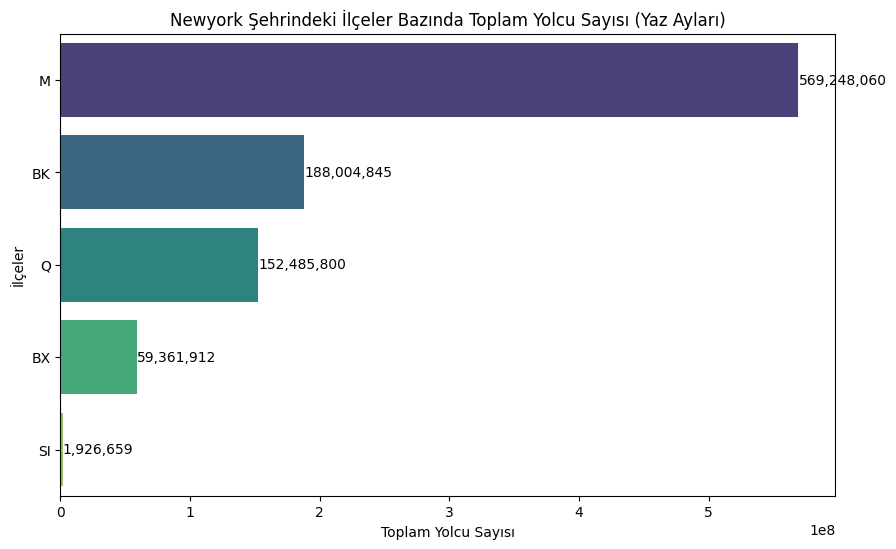

In [56]:
grouped_data = mta_summer.groupby('borough').sum().sort_values('ridership', ascending=False).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='ridership', y='borough', data=grouped_data, palette='viridis')

plt.xlabel('Toplam Yolcu Sayısı')
plt.ylabel('İlçeler')
plt.title('Newyork Şehrindeki İlçeler Bazında Toplam Yolcu Sayısı (Yaz Ayları)')


for index, row in grouped_data.iterrows():
    plt.text(row['ridership'], index, f'{row["ridership"]:,}', va='center')


plt.show()

C:\Users\Code\AppData\Local\Temp\ipykernel_4760\1757652879.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="ridership", y="borough", data=grouped_mean, palette="viridis")


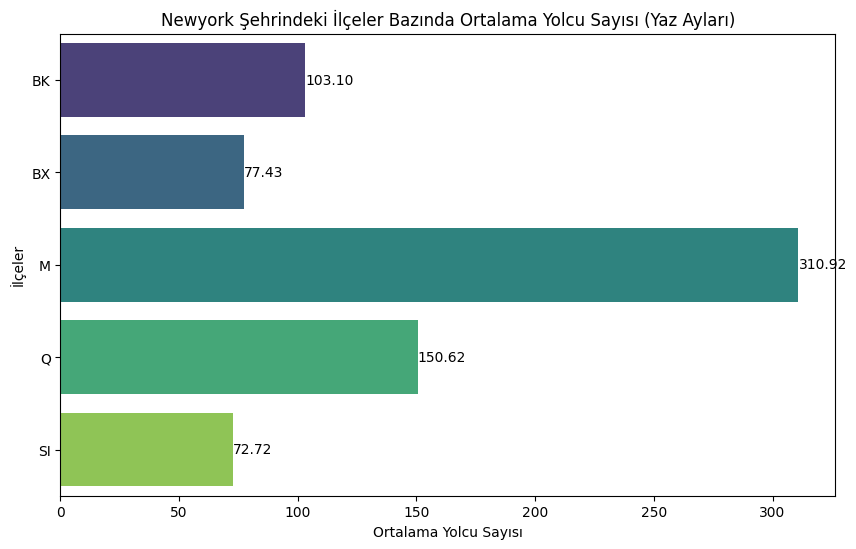

In [55]:
grouped_mean = mta_summer.groupby("borough")["ridership"].mean().reset_index()


plt.figure(figsize=(10, 6))
sns.barplot(x="ridership", y="borough", data=grouped_mean, palette="viridis")

plt.xlabel("Ortalama Yolcu Sayısı")
plt.ylabel("İlçeler")
plt.title('Newyork Şehrindeki İlçeler Bazında Ortalama Yolcu Sayısı (Yaz Ayları)')


for index, row in grouped_mean.iterrows():
    plt.text(row["ridership"], index, f"{row['ridership']:.2f}", va="center")

plt.show()

C:\Users\Code\AppData\Local\Temp\ipykernel_4760\490408531.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_routes = mta_summer.groupby('routes').sum().sort_values('ridership', ascending=False).reset_index().head(20)
C:\Users\Code\AppData\Local\Temp\ipykernel_4760\490408531.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ridership', y='routes', data=grouped_routes, palette='viridis')


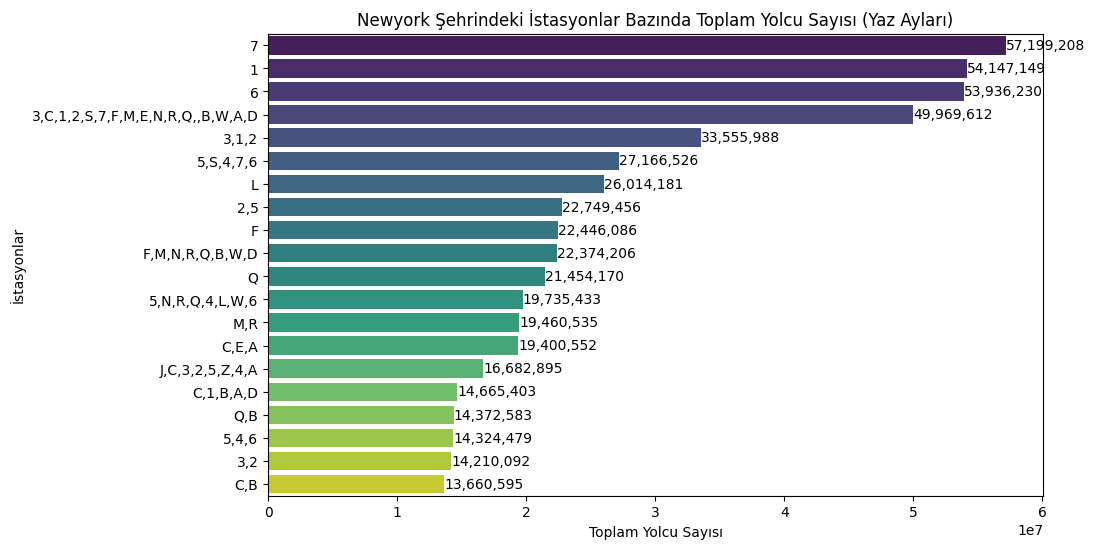

In [60]:
grouped_routes = mta_summer.groupby('routes').sum().sort_values('ridership', ascending=False).reset_index().head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x='ridership', y='routes', data=grouped_routes, palette='viridis')

plt.xlabel('Toplam Yolcu Sayısı')
plt.ylabel('Routes')
plt.title('Newyork Şehrindeki Route Bazında Toplam Yolcu Sayısı (Yaz Ayları)')


for index, row in grouped_routes.iterrows():
    plt.text(row['ridership'], index, f'{row["ridership"]:,}', va='center')


plt.show()

C:\Users\Code\AppData\Local\Temp\ipykernel_4760\152000644.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_top_routes = mta_summer.groupby('routes').mean().sort_values('ridership', ascending=False).reset_index().head(20)
C:\Users\Code\AppData\Local\Temp\ipykernel_4760\152000644.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ridership', y='routes', data=grouped_top_routes, palette='viridis')


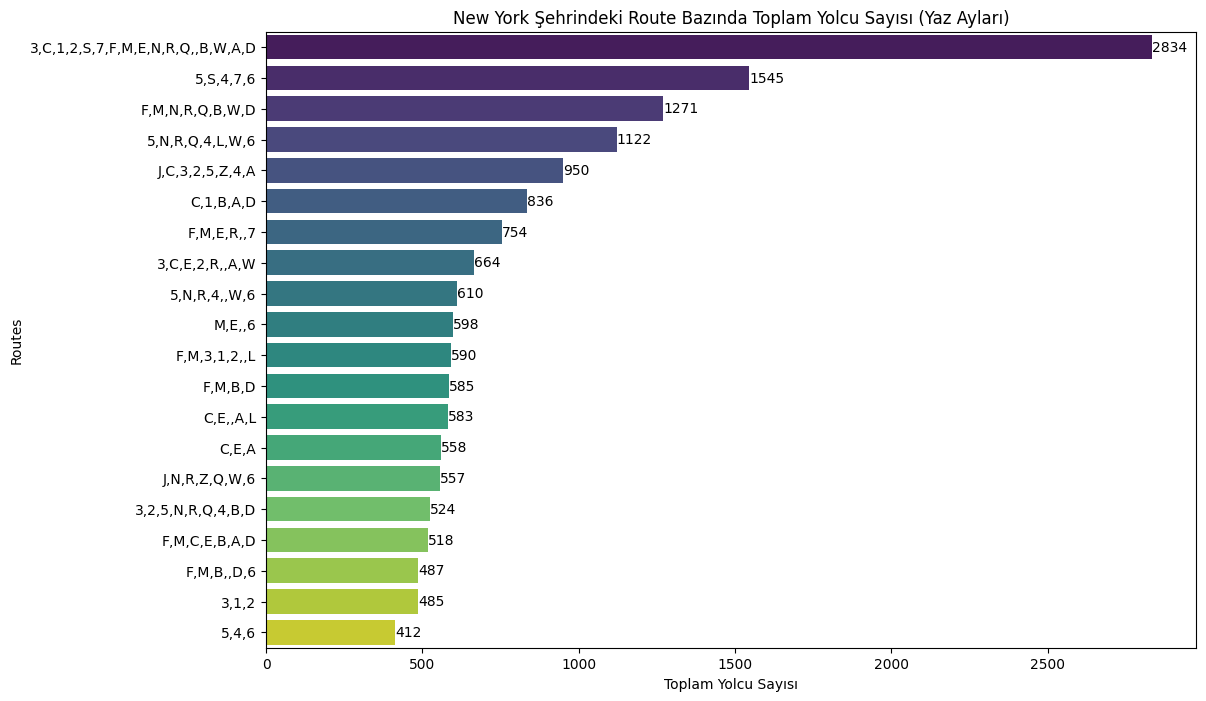

In [79]:
grouped_top_routes = mta_summer.groupby('routes').mean().sort_values('ridership', ascending=False).reset_index().head(20)

plt.figure(figsize=(12, 8))
sns.barplot(x='ridership', y='routes', data=grouped_top_routes, palette='viridis')

plt.xlabel('Toplam Yolcu Sayısı')
plt.ylabel('Routes')
plt.title('New York Şehrindeki Route Bazında Toplam Yolcu Sayısı (Yaz Ayları)')

for index, row in grouped_top_routes.iterrows():
    ridership_text = f'{row["ridership"]:.0f}'  
    plt.text(row['ridership'], index, ridership_text, va='center')

plt.show()

C:\Users\Code\AppData\Local\Temp\ipykernel_4760\3879870686.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_top_station_complex = mta_summer.groupby('station_complex').sum().sort_values('ridership', ascending=False).reset_index().head(20)
C:\Users\Code\AppData\Local\Temp\ipykernel_4760\3879870686.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ridership', y='station_complex', data=grouped_top_station_complex, palette='viridis')


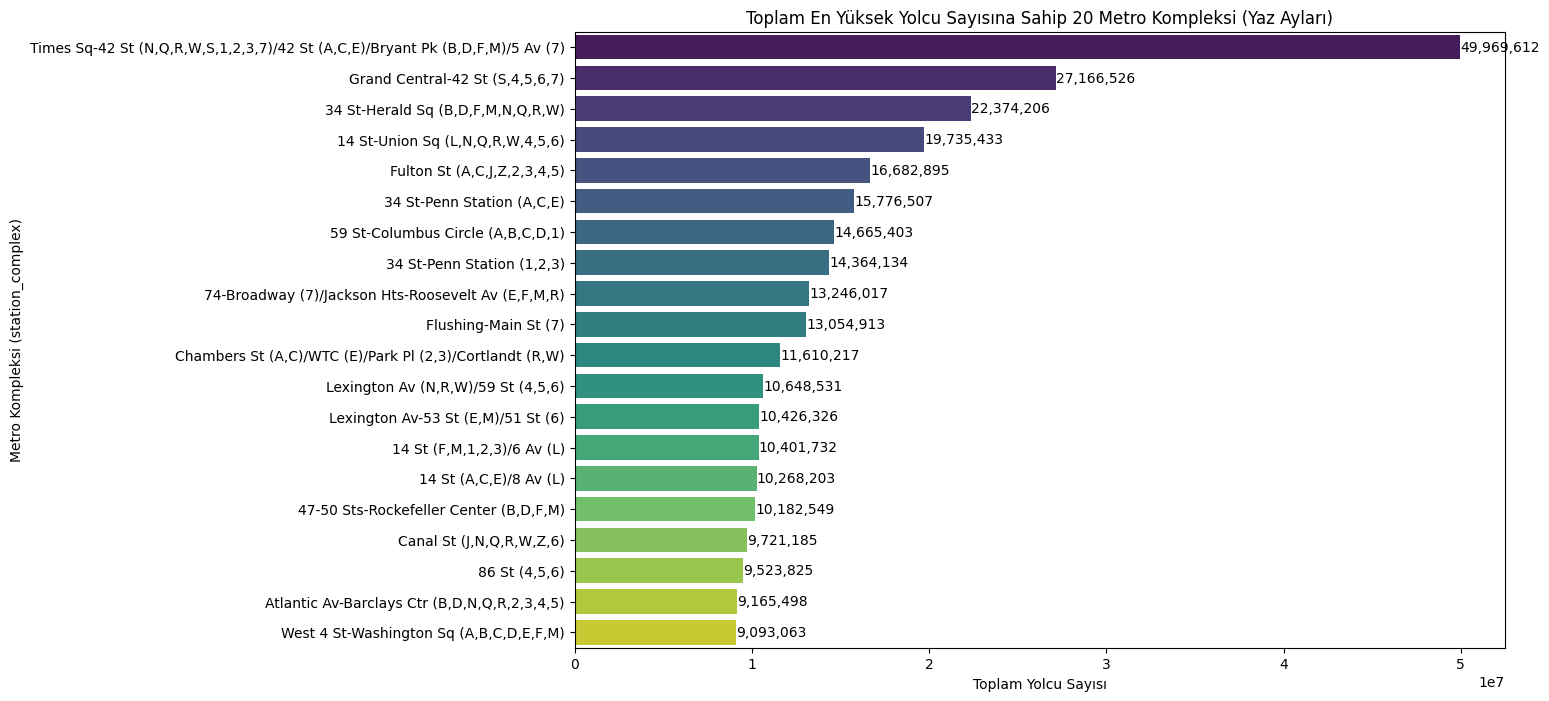

In [68]:
grouped_top_station_complex = mta_summer.groupby('station_complex').sum().sort_values('ridership', ascending=False).reset_index().head(20)

plt.figure(figsize=(12, 8))
sns.barplot(x='ridership', y='station_complex', data=grouped_top_station_complex, palette='viridis')


plt.xlabel('Toplam Yolcu Sayısı')
plt.ylabel('Metro Kompleksi (station_complex)')
plt.title('Toplam En Yüksek Yolcu Sayısına Sahip 20 Metro Kompleksi (Yaz Ayları)')


for index, row in grouped_top_station_complex.iterrows():
    plt.text(row['ridership'], index, f'{row["ridership"]:,}', va='center')


plt.show()


C:\Users\Code\AppData\Local\Temp\ipykernel_4760\2863219659.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_ridership_by_station_complex = mta_summer.groupby('station_complex').mean().sort_values('ridership', ascending=False).reset_index().head(20)
C:\Users\Code\AppData\Local\Temp\ipykernel_4760\2863219659.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="ridership", y="station_complex", data=mean_ridership_by_station_complex, palette="viridis")


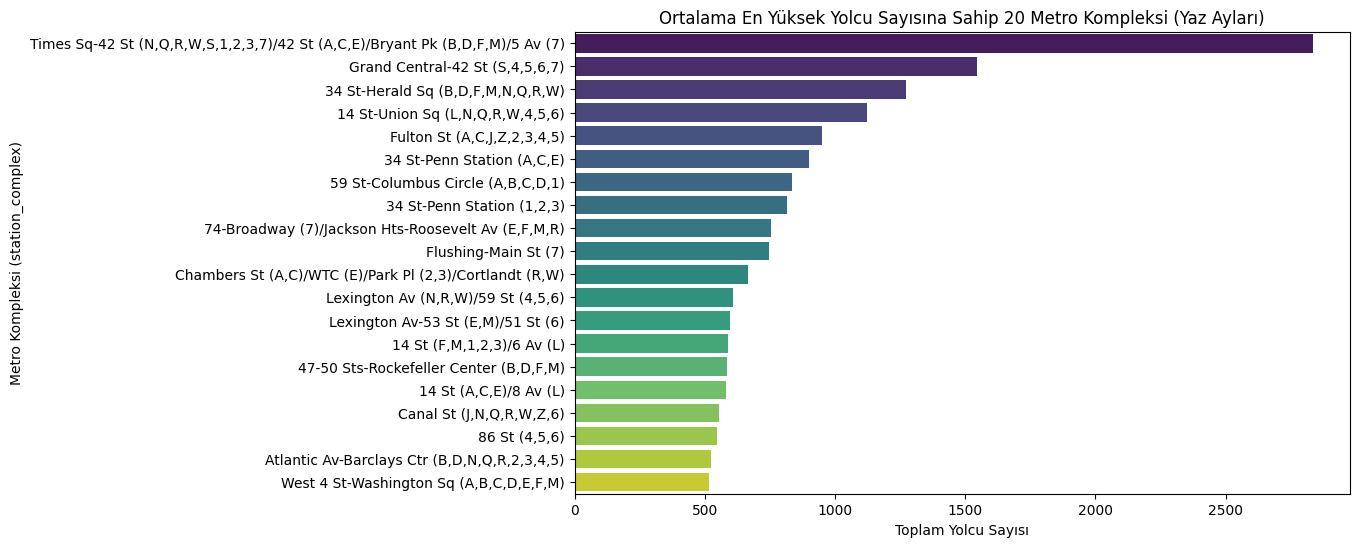

In [70]:
mean_ridership_by_station_complex = mta_summer.groupby('station_complex').mean().sort_values('ridership', ascending=False).reset_index().head(20)


plt.figure(figsize=(10, 6))


sns.barplot(x="ridership", y="station_complex", data=mean_ridership_by_station_complex, palette="viridis")


plt.xlabel('Toplam Yolcu Sayısı')
plt.ylabel('Metro Kompleksi (station_complex)')
plt.title('Ortalama En Yüksek Yolcu Sayısına Sahip 20 Metro Kompleksi (Yaz Ayları)')


plt.show()

C:\Users\Code\AppData\Local\Temp\ipykernel_4760\1001055834.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_top_time = mta_summer.groupby('time').sum().sort_values('ridership', ascending=False).reset_index().head(20)
C:\Users\Code\AppData\Local\Temp\ipykernel_4760\1001055834.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ridership', y='time', data=grouped_top_time, palette='viridis')


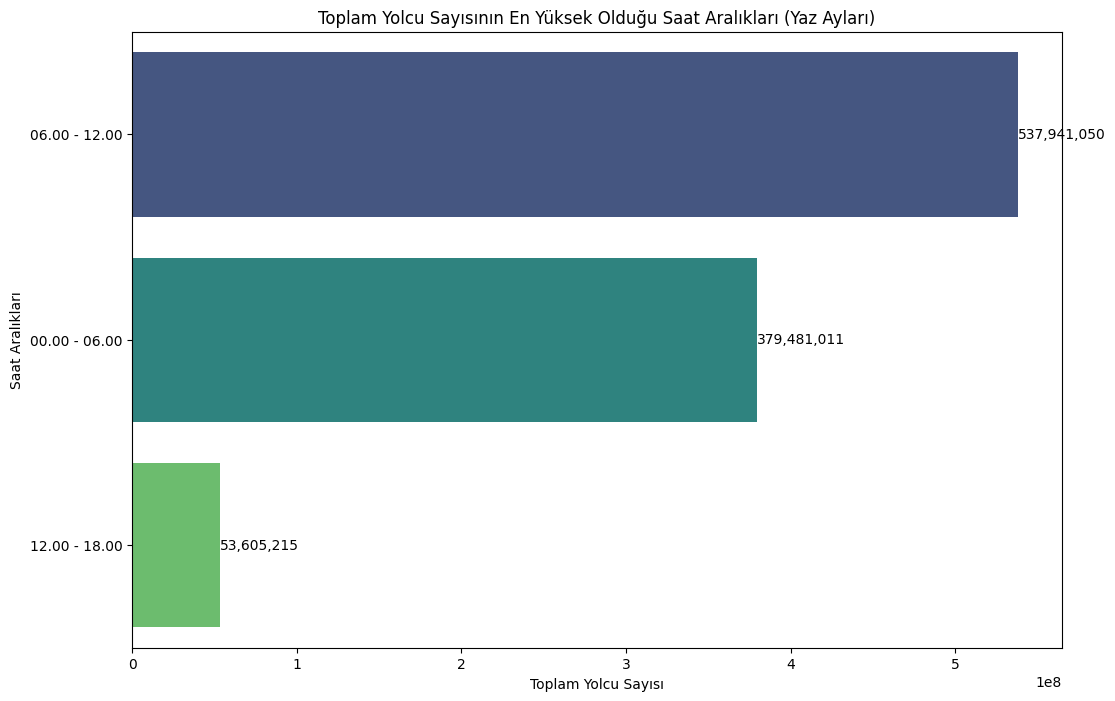

In [73]:
grouped_top_time = mta_summer.groupby('time').sum().sort_values('ridership', ascending=False).reset_index().head(20)

plt.figure(figsize=(12, 8))
sns.barplot(x='ridership', y='time', data=grouped_top_time, palette='viridis')


plt.xlabel('Toplam Yolcu Sayısı')
plt.ylabel('Saat Aralıkları')
plt.title('Toplam Yolcu Sayısının En Yüksek Olduğu Saat Aralıkları (Yaz Ayları)')


for index, row in grouped_top_time.iterrows():
    plt.text(row['ridership'], index, f'{row["ridership"]:,}', va='center')


plt.show()


C:\Users\Code\AppData\Local\Temp\ipykernel_4760\1038420892.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_ridership_by_time = mta_summer.groupby('time').mean().sort_values('ridership', ascending=False).reset_index().head(20)
C:\Users\Code\AppData\Local\Temp\ipykernel_4760\1038420892.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="ridership", y="time", data=mean_ridership_by_time, palette="viridis")


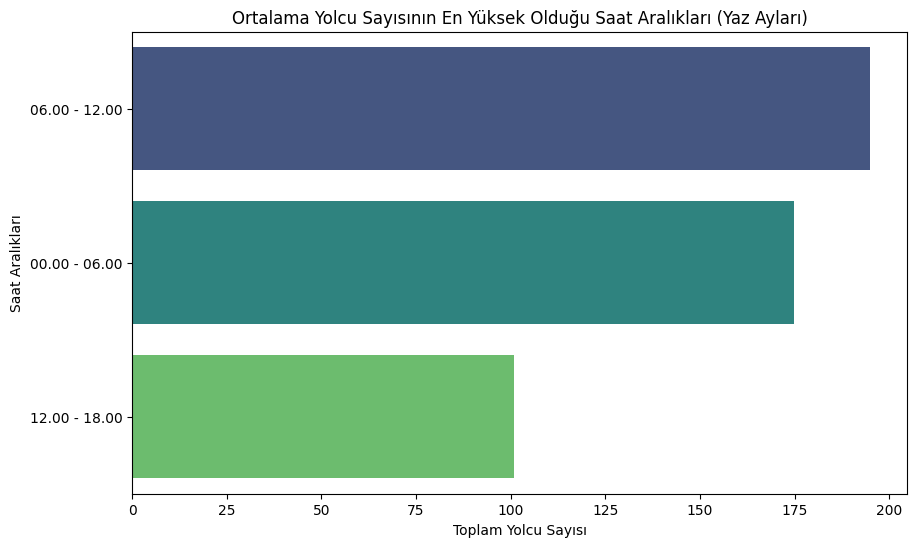

In [74]:
mean_ridership_by_time = mta_summer.groupby('time').mean().sort_values('ridership', ascending=False).reset_index().head(20)


plt.figure(figsize=(10, 6))


sns.barplot(x="ridership", y="time", data=mean_ridership_by_time, palette="viridis")


plt.xlabel('Toplam Yolcu Sayısı')
plt.ylabel('Saat Aralıkları')
plt.title('Ortalama Yolcu Sayısının En Yüksek Olduğu Saat Aralıkları (Yaz Ayları)')



plt.show()

C:\Users\Code\AppData\Local\Temp\ipykernel_4760\2441423928.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_top_dayofweek = mta_summer.groupby('day_of_week').sum().sort_values('ridership', ascending=False).reset_index().head(20)
C:\Users\Code\AppData\Local\Temp\ipykernel_4760\2441423928.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ridership', y='day_of_week', data=grouped_top_dayofweek, palette='viridis')


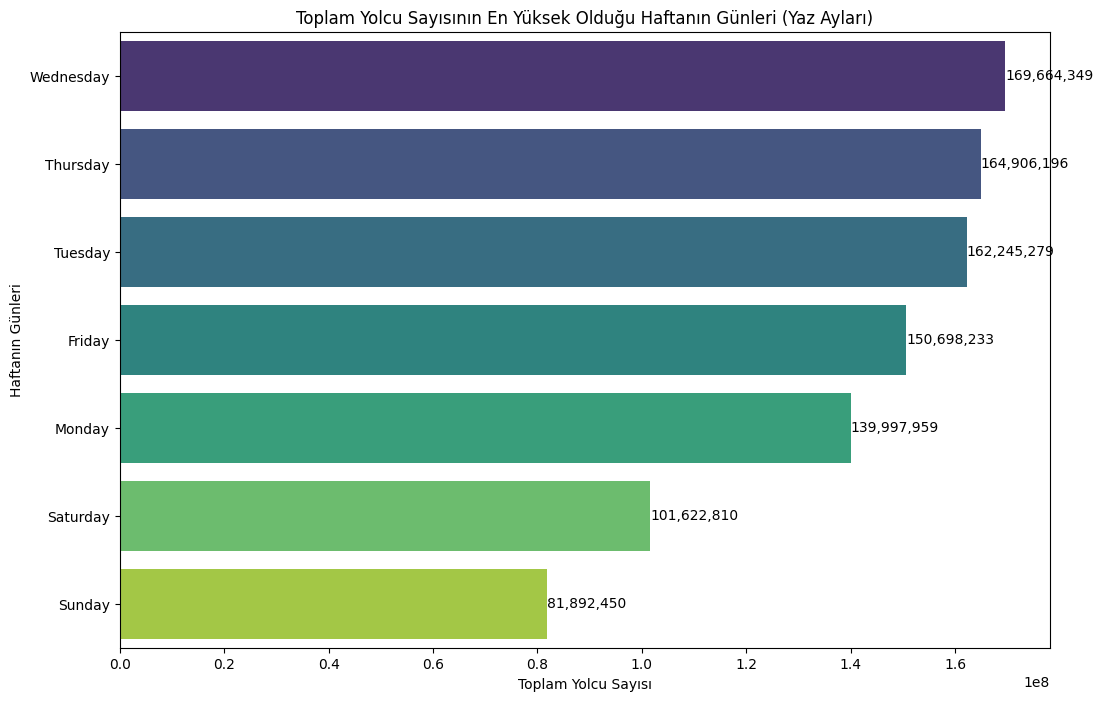

In [76]:
grouped_top_dayofweek = mta_summer.groupby('day_of_week').sum().sort_values('ridership', ascending=False).reset_index().head(20)

plt.figure(figsize=(12, 8))
sns.barplot(x='ridership', y='day_of_week', data=grouped_top_dayofweek, palette='viridis')


plt.xlabel('Toplam Yolcu Sayısı')
plt.ylabel('Haftanın Günleri')
plt.title('Toplam Yolcu Sayısının En Yüksek Olduğu Haftanın Günleri (Yaz Ayları)')


for index, row in grouped_top_dayofweek.iterrows():
    plt.text(row['ridership'], index, f'{row["ridership"]:,}', va='center')


plt.show()


C:\Users\Code\AppData\Local\Temp\ipykernel_4760\3203288047.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_ridership_by_dayofweek = mta_summer.groupby('day_of_week').mean().sort_values('ridership', ascending=False).reset_index().head(20)
C:\Users\Code\AppData\Local\Temp\ipykernel_4760\3203288047.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="ridership", y="day_of_week", data=mean_ridership_by_dayofweek, palette="viridis")


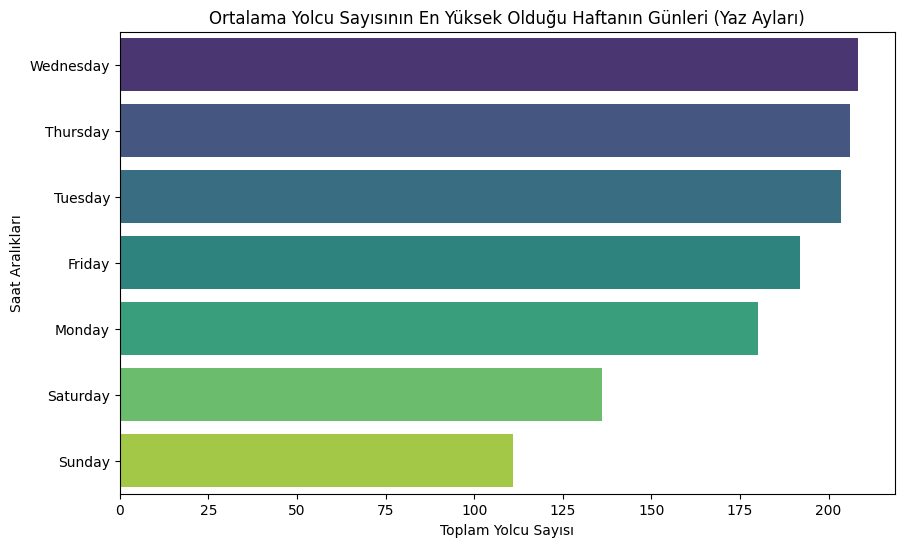

In [77]:
mean_ridership_by_dayofweek = mta_summer.groupby('day_of_week').mean().sort_values('ridership', ascending=False).reset_index().head(20)


plt.figure(figsize=(10, 6))


sns.barplot(x="ridership", y="day_of_week", data=mean_ridership_by_dayofweek, palette="viridis")


plt.xlabel('Toplam Yolcu Sayısı')
plt.ylabel('Saat Aralıkları')
plt.title('Ortalama Yolcu Sayısının En Yüksek Olduğu Haftanın Günleri (Yaz Ayları)')



plt.show()

In [87]:
optimize_result = mta_summer.groupby(['day_of_week', 'time', "station_complex" , "routes","borough"]).mean().sort_values('ridership', ascending=False).reset_index().head(20)
optimize_result.drop(["transfers"],inplace = True, axis = 1)
optimize_result

C:\Users\Code\AppData\Local\Temp\ipykernel_4760\3323277729.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  optimize_result = mta_summer.groupby(['day_of_week', 'time', "station_complex" , "routes","borough"]).mean().sort_values('ridership', ascending=False).reset_index().head(20)


,day_of_week,time,station_complex,routes,borough,ridership
0,Wednesday,06.00 - 12.00,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...","3,C,1,2,S,7,F,M,E,N,R,Q,,B,W,A,D",M,4052.179428
1,Thursday,06.00 - 12.00,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...","3,C,1,2,S,7,F,M,E,N,R,Q,,B,W,A,D",M,4001.015736
2,Tuesday,06.00 - 12.00,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...","3,C,1,2,S,7,F,M,E,N,R,Q,,B,W,A,D",M,3928.422835
3,Friday,06.00 - 12.00,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...","3,C,1,2,S,7,F,M,E,N,R,Q,,B,W,A,D",M,3465.209936
4,Monday,06.00 - 12.00,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...","3,C,1,2,S,7,F,M,E,N,R,Q,,B,W,A,D",M,3247.219727
5,Wednesday,00.00 - 06.00,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...","3,C,1,2,S,7,F,M,E,N,R,Q,,B,W,A,D",M,2975.121860
6,Thursday,00.00 - 06.00,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...","3,C,1,2,S,7,F,M,E,N,R,Q,,B,W,A,D",M,2811.479206
7,Tuesday,00.00 - 06.00,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...","3,C,1,2,S,7,F,M,E,N,R,Q,,B,W,A,D",M,2799.585458
8,Friday,00.00 - 06.00,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...","3,C,1,2,S,7,F,M,E,N,R,Q,,B,W,A,D",M,2602.194418
9,Monday,00.00 - 06.00,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...","3,C,1,2,S,7,F,M,E,N,R,Q,,B,W,A,D",M,2460.932563


In [ ]:
# Etkinlik yaz aylarında olacağı için  

In [11]:
mta_2["date"].min()

'01/01/2023'